# To do the following exercises you need to know how to use:
* pandas dataframes
* dictionaries
* plotting array of images
* convert data to .to_numpy()
* assign inputs (features) to **X_data**
* assign outputs (labels/targets) to **y_data**
* understand the output of attribute .shape (dimensions of the data)
* generate random integers np.random.randint()
* convert color image to grayscale

# Exercise 1
* the file 'mnist_test.csv' contains 10000 images of digits in grayscale saved as a rows in the csv file
* first column contains value of the digits then 784 columns correspond to pixels
* make an array of plots of 25 randomly chosen images (5x5) 
* each plot has to have a title corresponding to a digit 

In [5]:
!pip install tensorflow

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("mnist_test.csv", sep=",")

In [8]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


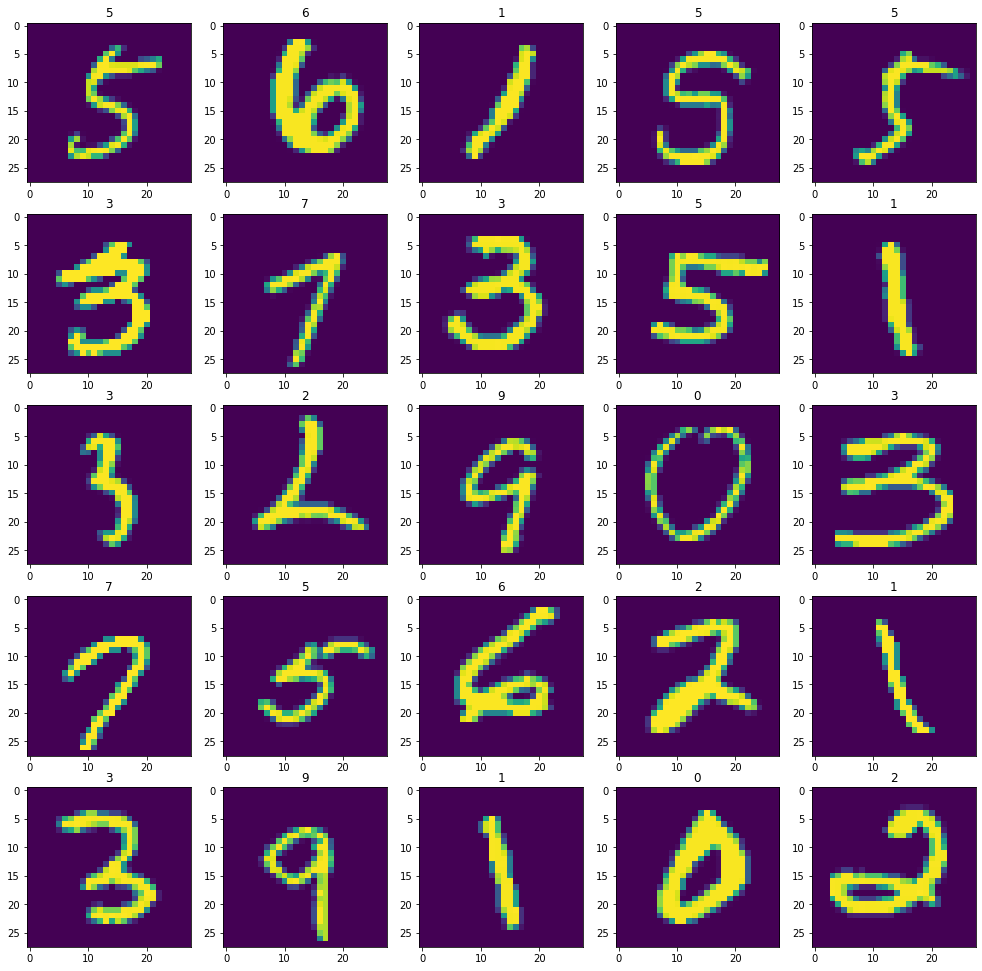

In [9]:
uni = df["label"].unique()
random_dig = np.random.randint(len(uni),size=25)
fig, ax = plt.subplots(5,5,figsize=(17,17))
j = 0 
k = 0
for i in random_dig:
    digit = df[df['label'] == i].drop(['label'],axis=1).reset_index(drop=True)
    img = digit.iloc[np.random.randint(digit.shape[0])].to_numpy().reshape(28,28)

    ax[j][k].imshow(img,aspect='auto')
    ax[j][k].set_title('{}'.format(i))
    
    k += 1
    if k == 5:
        k = 0
        j += 1

# Exercise 2

* Sklearn digits dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) contains 1797 images of digits in grayscale 
* download the dataset (command is below) and:
* make an array of plots of 25 randomly chosen images (5 images x 5 images) 
* each plot has to have a title corresponding to a digit 

In [10]:
from sklearn import datasets
digits = datasets.load_digits() # digits is a dictionary

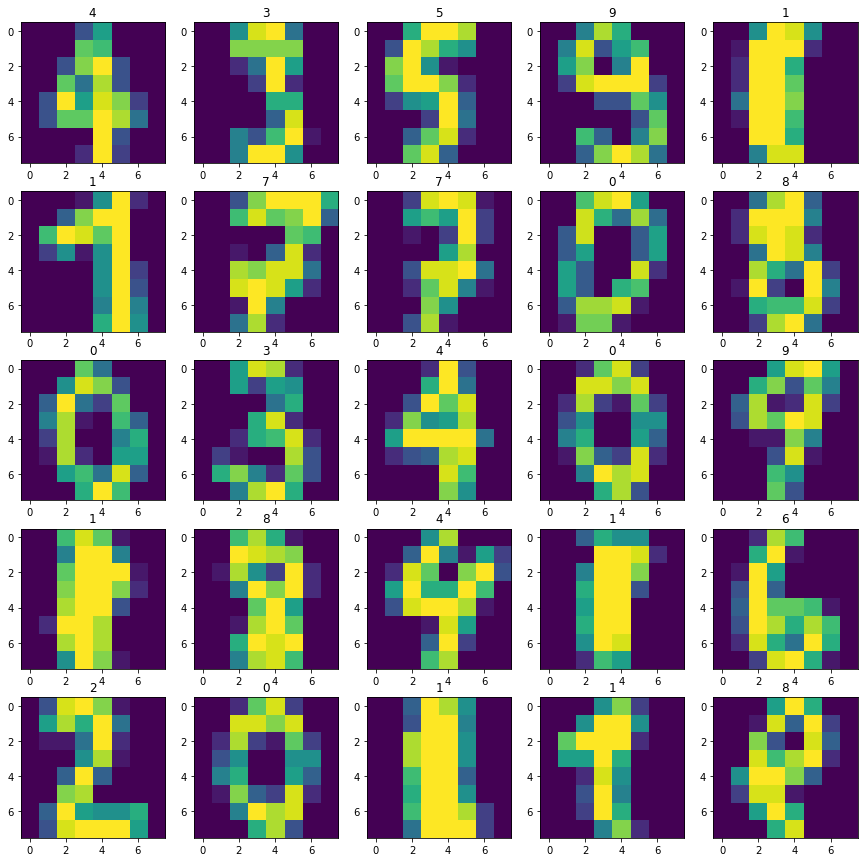

In [11]:
digits.keys()
X_data=digits['data']
y_data = digits['target']

lookup_table = dict(zip(np.unique(digits['target']),np.unique(digits['target_names'])))

random_digits = np.random.randint(0,X_data.shape[0], size=25)
fig, ax = plt.subplots(5,5,figsize=(15,15))

j = 0 
k = 0
for i in random_digits:
    img = X_data[i].reshape(8,8) 
    ax[j][k].imshow(img,aspect='auto')
    ax[j][k].set_title('{}'.format(y_data[i]))
    
    k += 1
    if k == 5:
        k = 0
        j += 1

# Exercise 3
The CIFAR-10 dataset consists of, in total, 60000 **color** (three channels) images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. For an introduction and a download. 

http://www.cs.toronto.edu/~kriz/cifar.html

* make an array of plots of 25 randomly chosen images (5 images x 5 images) 
* each plot has to have a title with a corresponding label



* convert the color images to grayscale by averaging one of the dimensions and again display the images


* make an array of plots of 25 randomly chosen images (5 images x 5 images) 
* each plot has to have a title with a corresponding label

In [18]:
import tensorflow as tf
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(X_data, y_data), (_, _) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


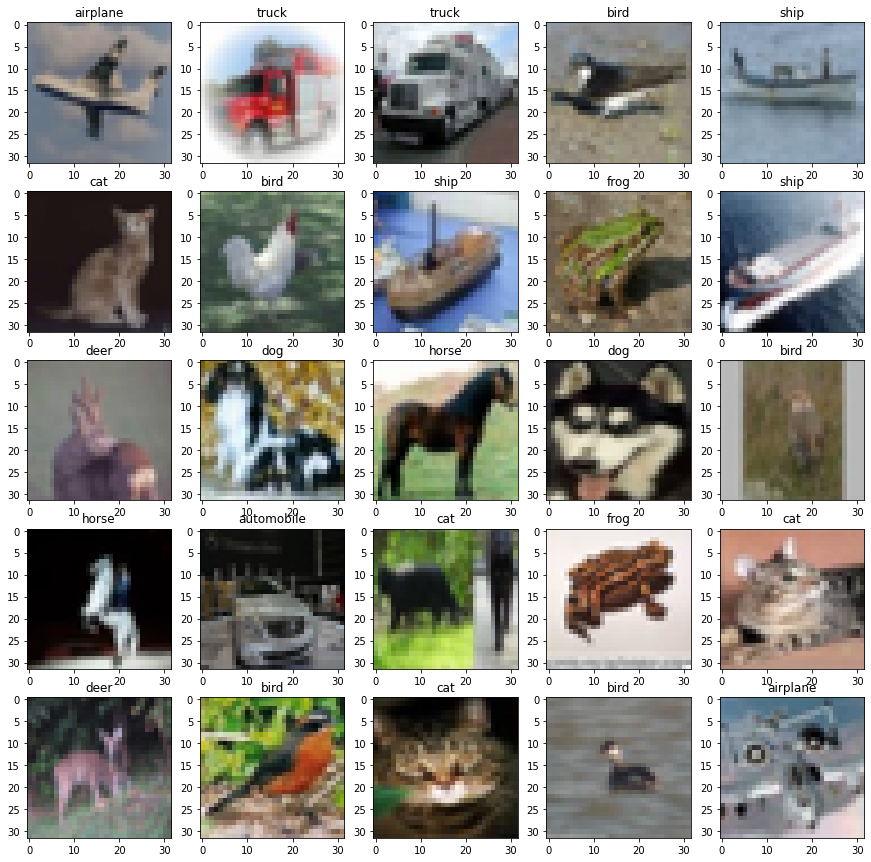

In [19]:
label_name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
x = np.arange(0,10)

dict_names = dict(zip(x,label_name)) 

random_img = np.random.randint(0,X_data.shape[0], size=25)
fig, ax = plt.subplots(5,5,figsize=(15,15))

j = 0 
k = 0
for i in random_img:

    img = X_data[i] 

    ax[j][k].imshow(img,aspect='auto')
    ax[j][k].set_title('{}'.format(dict_names[y_data[i][0]]))
    
    k += 1
    if k == 5:
        k = 0
        j += 1

In [20]:
from PIL import Image

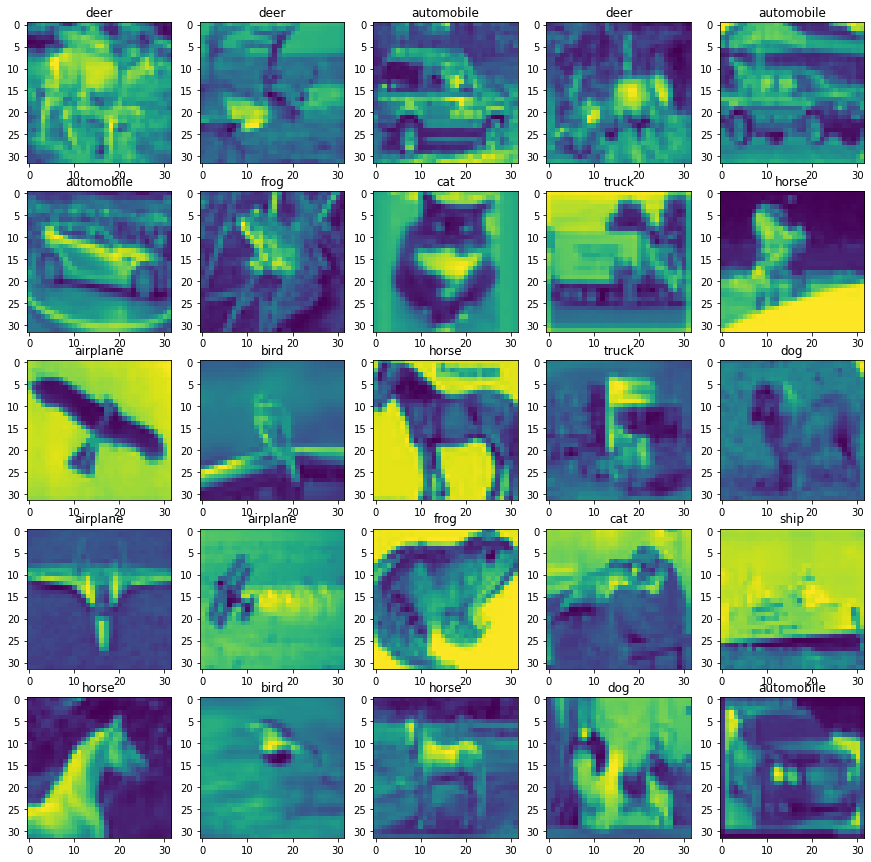

In [21]:
random_img = np.random.randint(0,X_data.shape[0], size=25)
fig, ax = plt.subplots(5,5,figsize=(15,15))

j = 0 
k = 0
for i in random_img:
    img = np.average(X_data[i],-1)

    ax[j][k].imshow(img,aspect='auto')
    ax[j][k].set_title('{}'.format(dict_names[y_data[i][0]]))
    
    k += 1
    if k == 5:
        k = 0
        j += 1